In [7]:
%matplotlib inline
import importlib
import dct
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
import imageio
import math
importlib.reload(dct)

<module 'dct' from '/home/crisbal/UniMaster/CalcoloScientifico/progetto2/dct.py'>

In [3]:
def remove_frequencies(frequencies, d):
    frequencies = frequencies.copy()
    freq_w = frequencies.shape[0]
    freq_h = frequencies.shape[1]
    for i in range(freq_w):
        for j in range(freq_h):
            if i+j >= d:
                frequencies[i][j] = 0
    return frequencies

In [4]:
def compress(image):
    image_width = image.shape[0]
    image_height = image.shape[1]
    hor_chunks = math.ceil(image_width / F)
    ver_chunks = math.ceil(image_height / F)

    compressed_image = image.copy()
    for h in range(hor_chunks):
        for v in range(ver_chunks):
            submatrix = image[h*F:min((h+1)*F, image_width), v*F:min((v+1)*F, image_height)]
            #print(submatrix)
            frequencies_matrix = dct.fdct2t(submatrix)
            #print(frequencies_matrix)
            removed_frequencies = remove_frequencies(frequencies_matrix, D)
            #print(removed_frequencies)
            inverted_frequencies = dct.ifdct2t(removed_frequencies)
            inverted_frequencies = np.rint(inverted_frequencies).astype(int)
            inverted_frequencies = np.clip(inverted_frequencies, 0, 255)
            #print(inverted_frequencies)
            compressed_image[h*F:min((h+1)*F, image_width), v*F:min((v+1)*F, image_height)] = inverted_frequencies
            #print(compressed_image)
            #break
        #break
    return compressed_image

done


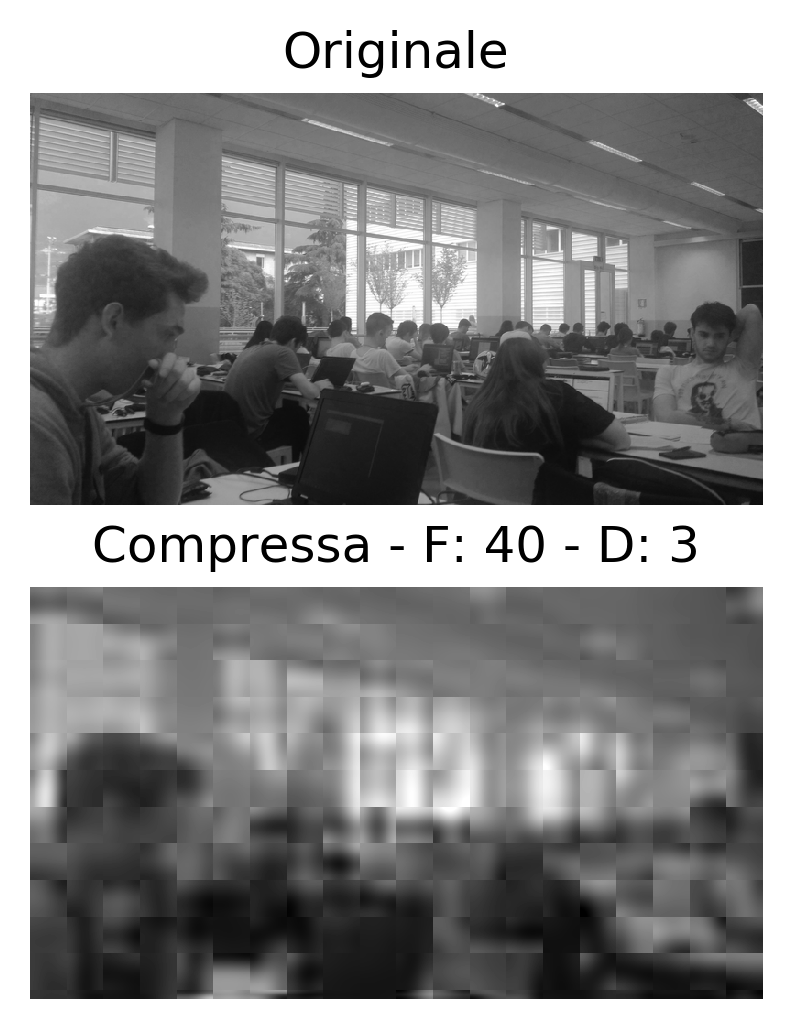

In [8]:
FILENAME = "poli"
FILEPATH = f'images/{FILENAME}.bmp'
F = 40
D = 3

image = imageio.imread(FILEPATH)[:,:,0]
compressed_image = compress(image)

if image.shape[0] > image.shape[1]:
    subplots = [121, 122]
else:
    subplots = [211, 212]

print("done")
plt.subplot(subplots[0])
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title("Originale")
plt.axis('off')

plt.subplot(subplots[1])
plt.title(f"Compressa - F: {F} - D: {D}")
plt.imshow(compressed_image, cmap='gray', vmin=0, vmax=255)
_ = plt.axis('off')
